# **Florida Bike Rentals Prediction**

-----------------------------
## **Context**
-----------------------------

Aura customer FloridaBikeRentals.com is unable to predict peaks and troughs in demand for their high-end bikes. 

-----------------------------
## **Objectives**
-----------------------------

They have approached Aura to customize a marketing tool to predict bike-sharing demand. To stabilize the demand, devise marketing strategies using the bike-sharing dataset.  Based on rented bike count, the hour of the day, the day's temperature, humidity, wind speed, rainfall, holidays, and many other factors, build a model to predict the bike count required at each hour for the stable supply of rental bikes. 

-----------------------------
## **Dataset**
-----------------------------

- **Date :** Date in year-month-day format

- **Rented Bike Count :** Count of bikes rented at each hour

- **Hour :** Hour of the day 

- **Temperature :** Temperature in Celsius

- **Humidity :** Humidity in percentage 

- **Snowfall :** Snowfall in cm

- **Holiday :** Is it a holiday? Holiday/ No holiday

- **Windspeed :** Speed of the wind in meters per sec (m/s)

- **Visibility :** Visibility in meters

- **Dew Point Temperature :** Dew point temperature in Celcius

- **Solar Radiation :** Radiant energy from the sun measured in MJ/m2 (per meters squared)

- **Rainfall :** Rainfall in mm

- **Seasons :** Season of the year – Winter, Summer, Spring, and Autumn

- **Functional Day :** Bike rented during functional (Fun) and nonfunctional hours (NoFunc)



## **Importing the libraries and overview of the dataset**

In [3]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **1. Load the dataset**

In [4]:
# Loading both train and test datasets

rental_df = pd.read_csv('FloridaBikeRentals.csv')



In [5]:
# Checking the first 5 rows of the dataset
rental_df.head()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### **Observations:**
- No observations

#### **Checking the info of the training data**

In [6]:
rental_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(∞C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(∞C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(∞C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(∞C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
rental_df.shape

(8760, 14)

In [9]:
rental_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(∞C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(∞C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#### **Observations:**

- The train dataset has **8760 observations and 14 columns**.
- We observe that some of the columns have data type **object**, which means they are strings or categorical variables.
- The remaining variables are all numerical in nature.

### **2. Check for null values in any columns and handle the missing values**

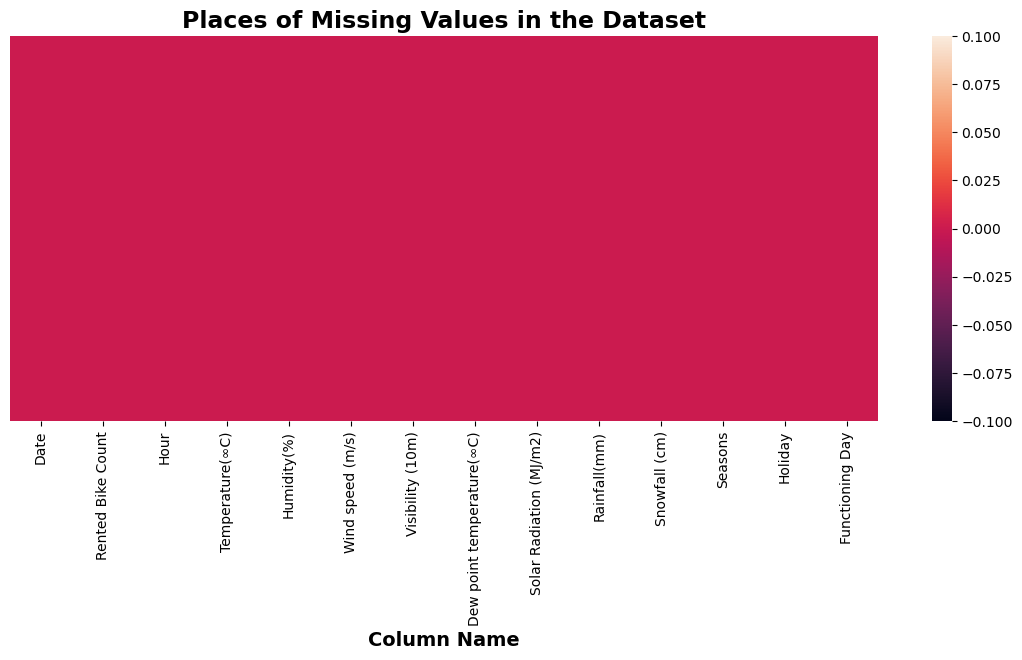

In [10]:
# Checking missing values
plt.figure(figsize=(14,5))
sns.heatmap(rental_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column Name", size=14, weight='bold')
plt.title("Places of Missing Values in the Dataset", size=17, fontweight='bold')
plt.show()

In [11]:
rental_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### **Observations**
 - There are no missing values in the dataset

### **3. Convert Date Columns to Date Format and extract day, month, and weekdays/weekend from date column**

In [12]:
rental_df['Date'] = pd.to_datetime(rental_df['Date'], format="%d/%m/%Y")


In [13]:
# Extracting day, month, day of week and weekdays/weekend from Date column

rental_df['Date'] = pd.to_datetime(rental_df['Date'])
rental_df['Month'] = rental_df['Date'].apply(lambda x: x.month)
rental_df['Day_of_Week'] = rental_df['Date'].dt.day_name()
rental_df['Weekdays_Weekend'] = rental_df['Day_of_Week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
rental_df = rental_df.drop(['Date', 'Day_of_Week'], axis=1)

In [14]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(∞C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(∞C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

### **4. Check correlation of features using a heatmap**

<Axes: >

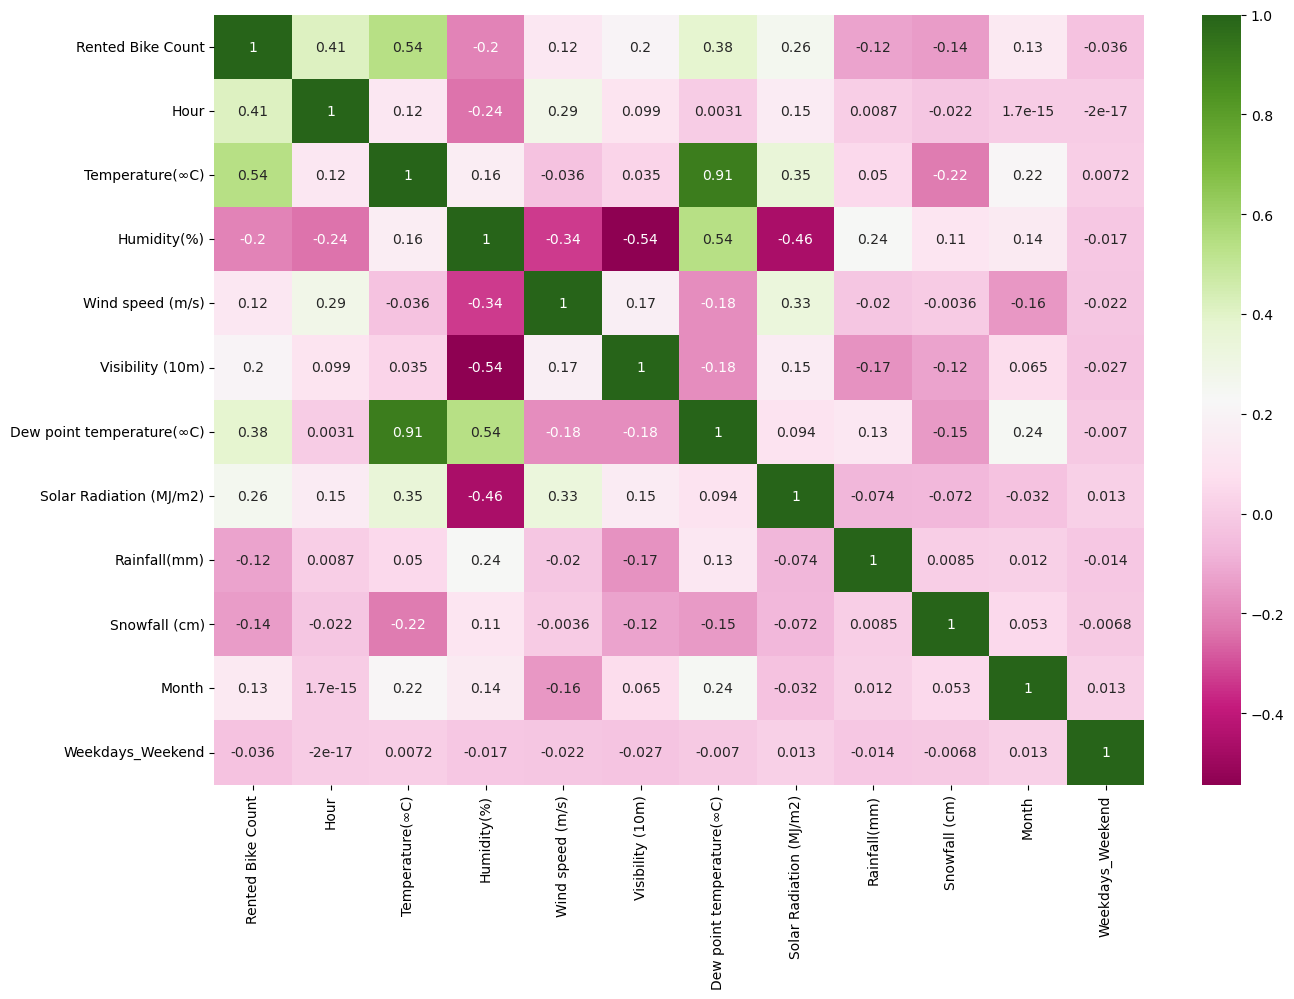

In [15]:
# Create new df with only numerical columns
rental_df_numerical = rental_df.select_dtypes(exclude=['object'])

# Checking the correlation of numerical columns
plt.figure(figsize=(15,10))
sns.heatmap(rental_df_numerical.corr(), annot=True, cmap='PiYG')


#### **Observations**
- The correlation heatmap shows the range of correlation between each of the variables/features.  The more darker the color the more they are correlated.

### **5. Plot The Distribution Plot of Rented Bike Count**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

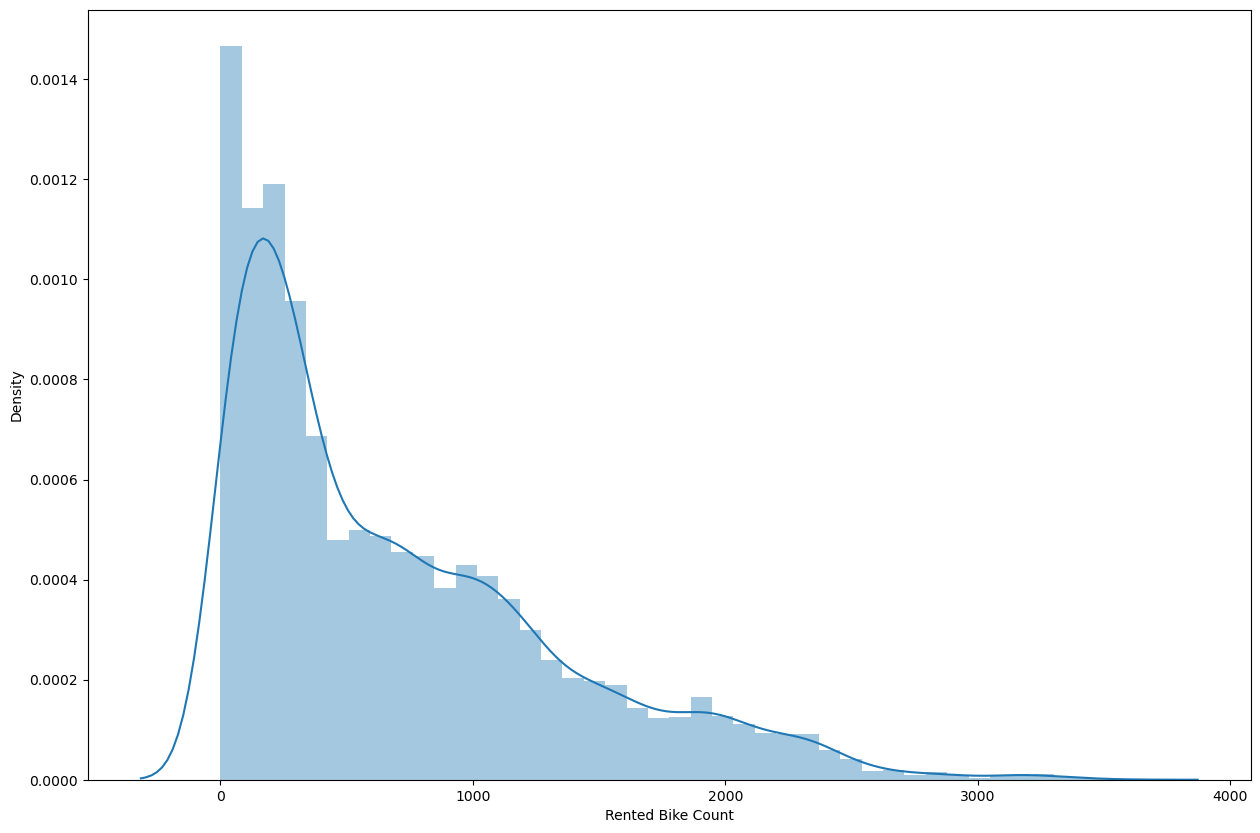

In [16]:
# Visualizing Distribution

plt.figure(figsize=(15,10))
sns.distplot(rental_df['Rented Bike Count'])

#### **Observations**
- The distribution plot shows that the density of the Rented Bike Count is at the peak around 350.

### **6. Plot the histogram of all numerical features**

In [17]:
# Numeric Features Information

rental_df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(∞C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(∞C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Month                      8760 non-null   int64  
 11  Weekdays_Weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [18]:
# Describe the numeric features

rental_df_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(∞C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(∞C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


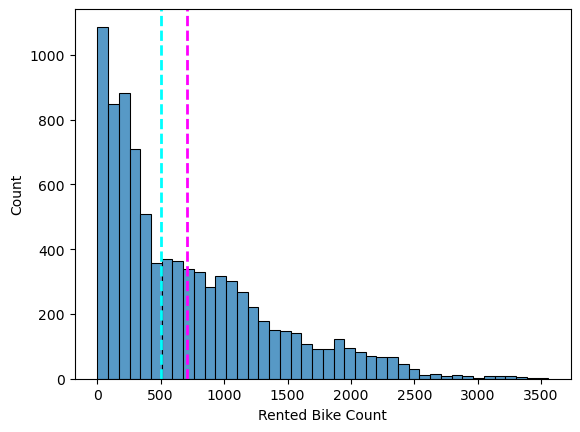

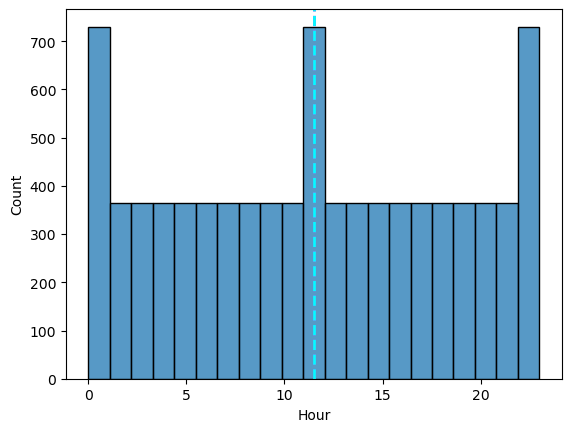

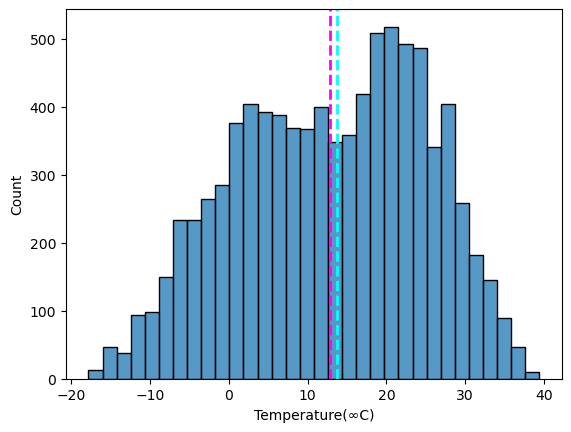

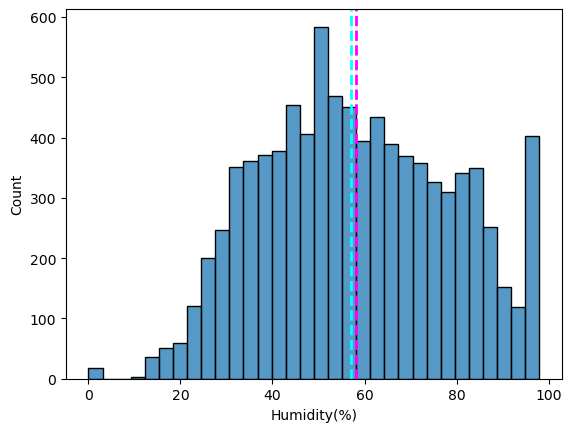

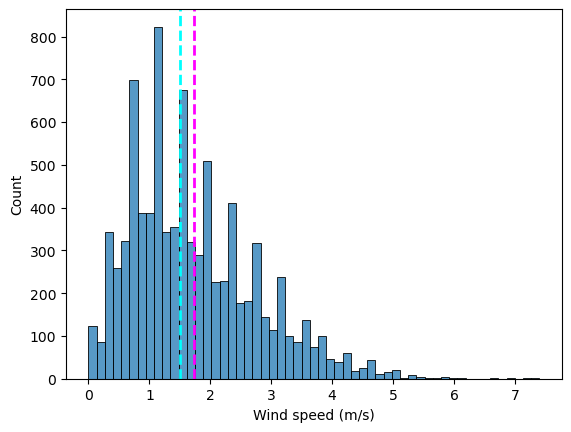

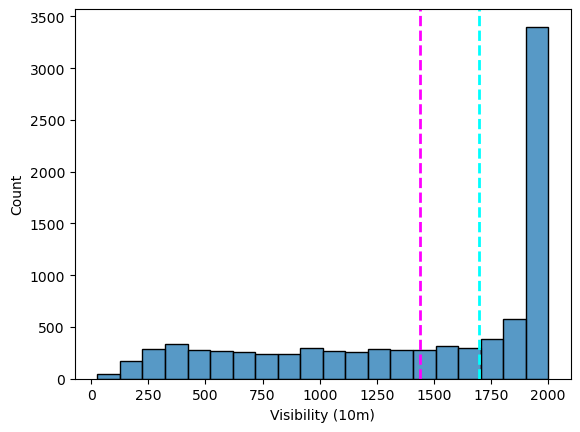

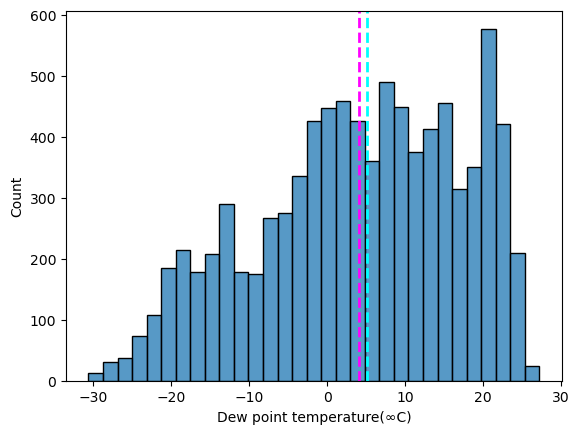

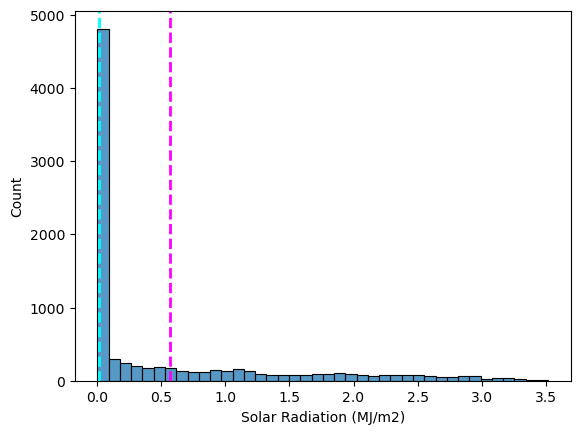

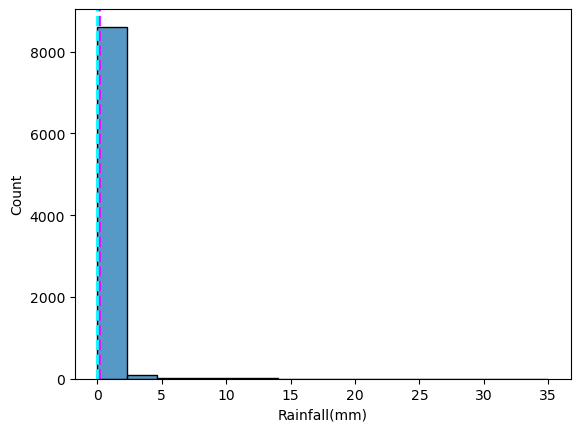

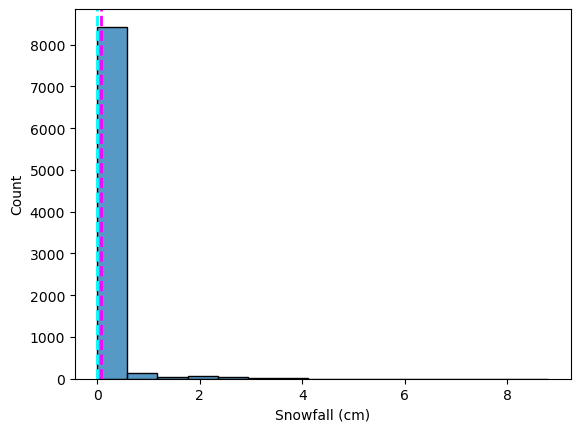

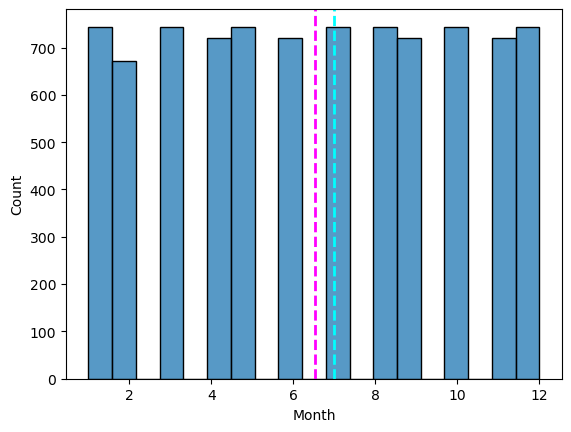

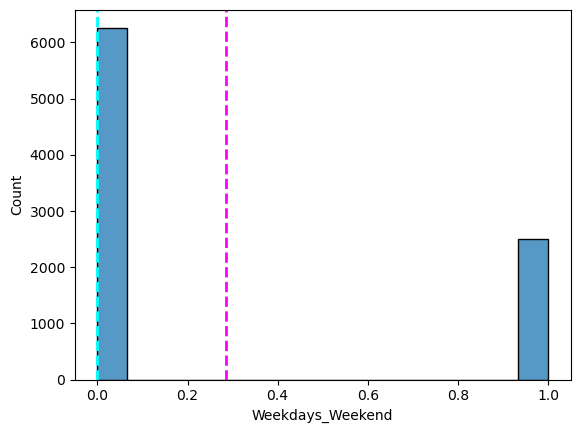

In [20]:
for col in rental_df_numerical[:]:
    sns.histplot(rental_df[col])
    plt.axvline(rental_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(rental_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.show()


#### **Observations**
- The histogram plots shows the distribution of each of the numerical variables across their bins
- Each graph shows when their count reach its peak. 

### **7. Plot the box plot of Rented Bike Count against all the categorical features**

In [25]:
# Extracting categorical features

categorical_features = rental_df.select_dtypes(include=['object'])

categorical_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [26]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


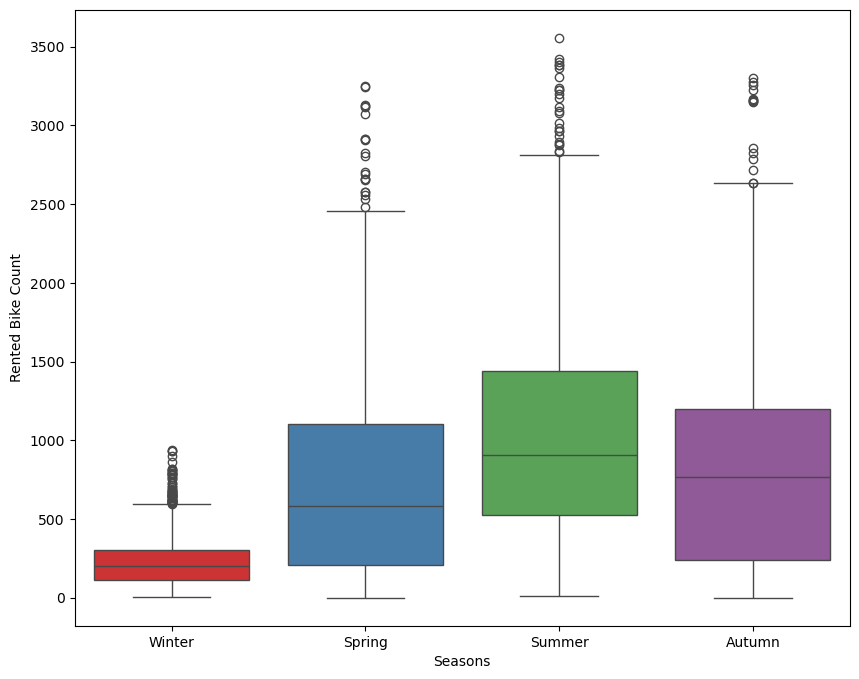

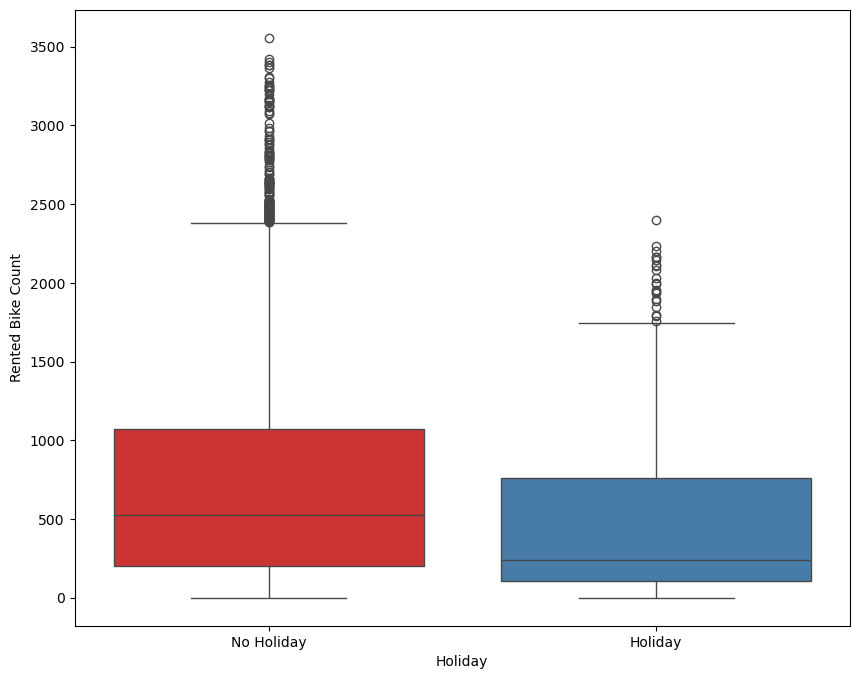

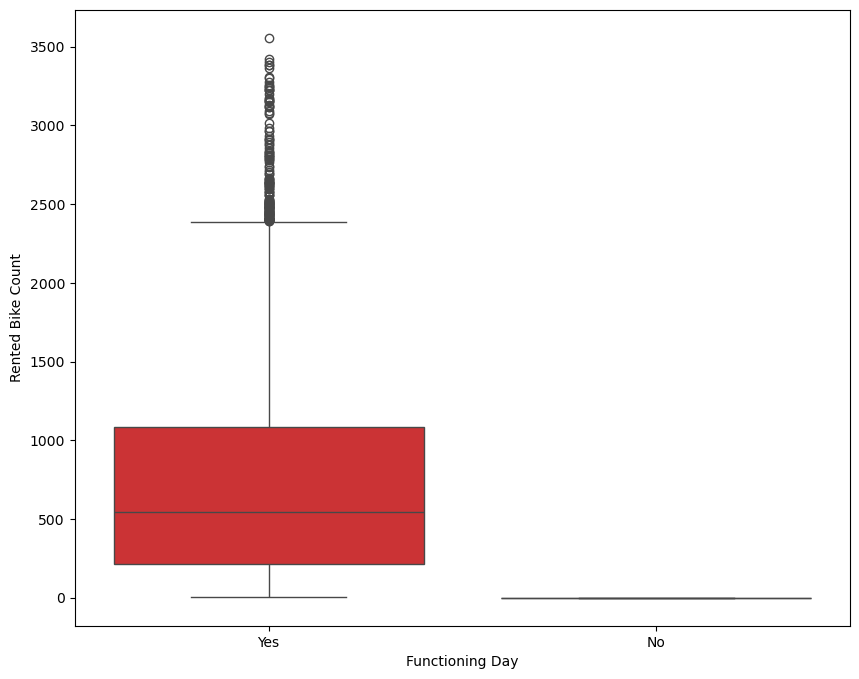

In [30]:
# Plotting Box Plot to visualize and trying to get information from plot

for col in categorical_features:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=col, y='Rented Bike Count', data=rental_df, palette='Set1')
    plt.show()

#### **Observations**
- Less demand in Winter Seasons
- Slightly Higher demand during Non-Holidays
- Almost no demand on Non-Functioning Day

In [31]:
# Checking Counts of Functioning Day

rental_df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

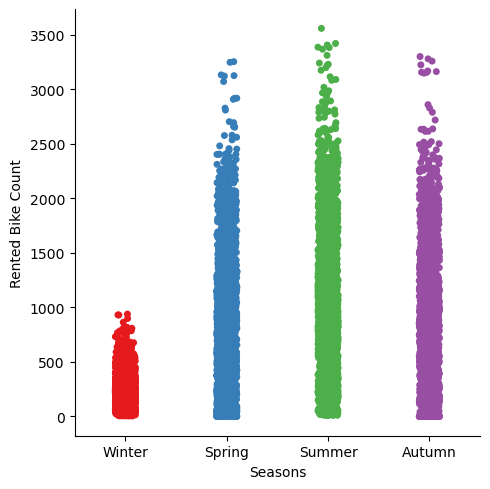

In [33]:
# Plotting Cat Plot for more information

sns.catplot(x='Seasons', y='Rented Bike Count', data=rental_df, palette='Set1')

#### **Observations**
- We can clearly see that there is less demand for rented bikes in the Winter Season

### 8. Plot the Seaborn Catplot fo Rented Bike Count against features like Hour, Holiday, Rainfall(mm), Snowfall(cm), Weekdays_Weekend and give your inferences

<Figure size 3000x5400 with 0 Axes>

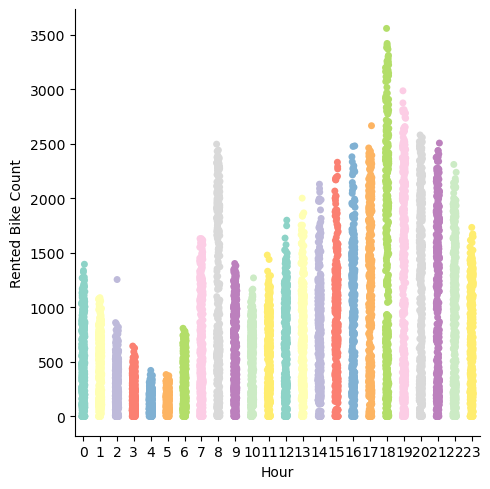

<Figure size 3000x5400 with 0 Axes>

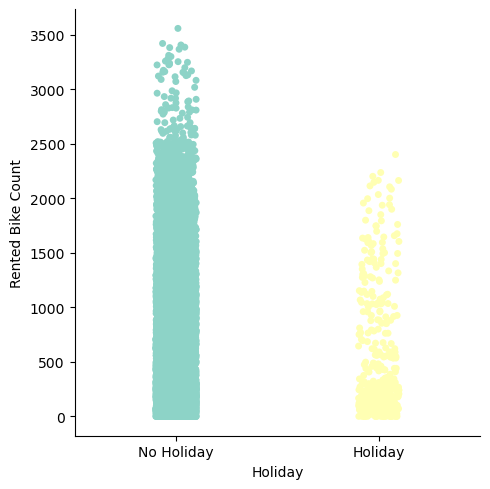

<Figure size 3000x5400 with 0 Axes>

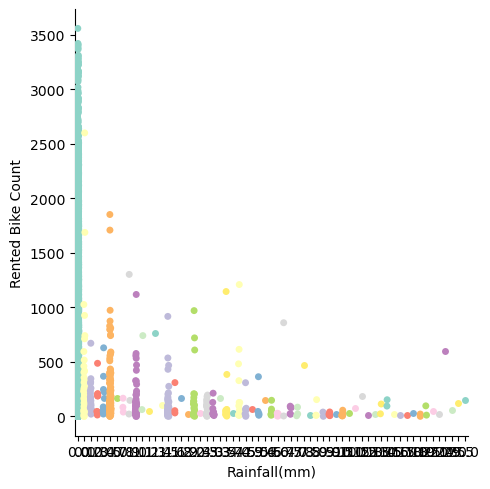

<Figure size 3000x5400 with 0 Axes>

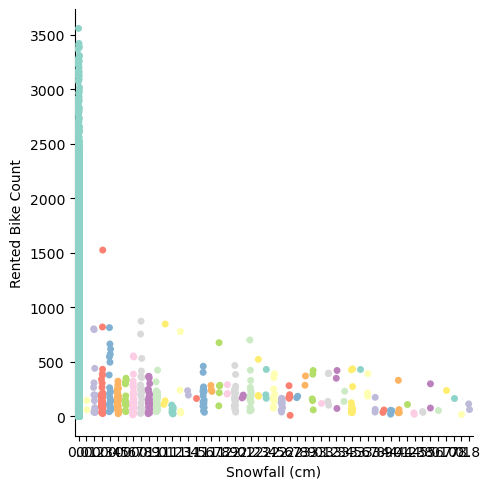

<Figure size 3000x5400 with 0 Axes>

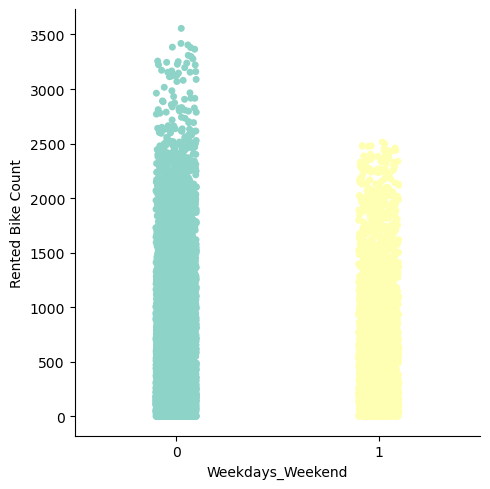

In [41]:
# Plotting Cat Plot on some features to get more information

feature_list=['Hour', 'Holiday', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekdays_Weekend']

for feature in feature_list:
    plt.figure(figsize=(10,18), dpi=300)
    sns.catplot(x=feature, y='Rented Bike Count', data=rental_df, palette='Set3')
    plt.show()

#### **Observations**

_From Hour vs Rented Bikes_
- We can clearly see there is high demand for Rented Bikes between the Office Hours